# ⚡ Electric Vehicle Population Analysis

## Executive Summary

This project analyzes the Electric Vehicle (EV) Population dataset in the United States. The aim is to understand trends in EV adoption across states, manufacturers, vehicle types, and model years. We explore patterns in EV growth, identify top-performing brands and states, and examine relationships between vehicle age, type, and location. The analysis leverages statistical tests, distribution summaries, and multiple visualizations (static and interactive) to provide actionable insights for policymakers, transportation planners, and environmental analysts.

## Data Card

### Dataset Origin

### Fields and Units

### Limitations

### License

## Loading and File I/O

## Simplified Exploratory Data Analysis (EDA)

## Statistical Analysis

### 1. Distribution Characterization

### 2. Group Comparison

### 3. Categorical Association

### 4. Correlation Between Numeric Variables

### 5. Additional Insight

## Visualizations

### Distribution Plot

### Comparison Plot

### Relationship Plot

### Time Series Plot

### Multi-Panel Facet Plot

### Interactive Plot (Plotly)

## Conclusions

## Appendix

### References & Resources


This project analyzes the Electric Vehicle Population dataset to understand trends in electric vehicle adoption across the United States. The goal is to provide insights for stakeholders such as policymakers, transportation planners, and environmental analysts about EV distribution by state, make, model, and fuel type. Through statistical analysis and visualizations, this project identifies patterns in EV growth over time, the most popular EV brands and models, and the regional distribution of electric vehicles.


### Dataset Origin

- Source: [Electric Vehicle Population Data - data.gov](https://catalog.data.gov/dataset/electric-vehicle-population-data)
- Downloaded as CSV for analysis.

### Fields and Units

- `VIN`: Vehicle Identification Number (unique ID)
- `Make`: Manufacturer of the vehicle
- `Model`: Vehicle model
- `Model Year`: Year of manufacture
- `Electric Vehicle Type`: Type of EV (Battery Electric, Plug-in Hybrid, etc.)
- `Fuel Type`: Type of fuel used (Electric, Hybrid)
- `State`: US state where the vehicle is registered
- `County`: County of registration
- `Street Address`: Owner’s registration address (may be partial or masked)
- `ZIP Code`: Postal code
- `County FIPS Code`: Federal Information Processing Standard code for county

### Limitations

- Some fields may have missing or incomplete values.
- Only includes registered vehicles; does not account for unregistered or out-of-state vehicles.
- Data is aggregated by vehicle registration and may not reflect real-time ownership.
- Geographic fields may be generalized for privacy.

### License

- Public domain (U.S. Government data).


In [ ]:
# Step 4: Loading and File I/O

# Import necessary libraries
import pandas as pd
from pathlib import Path

# Path to your CSV file
DATA_PATH = Path(
    "/Users/samarpangurung/Downloads/Electric_Vehicle_Population_Data.csv")

# Function to load CSV safely


def load_csv(path: Path) -> pd.DataFrame:
  """
  Load a CSV file with error handling and clear messages.

  Parameters:
      path (Path): Path to the CSV file.

  Returns:
      pd.DataFrame: Loaded dataframe.
  """
  try:
    df = pd.read_csv(path)
    print(f"Successfully loaded: {path.name}")
  except FileNotFoundError:
    raise FileNotFoundError(
        f"ERROR: File not found at {path}. Check the location.")
  except pd.errors.ParserError:
    raise ValueError(f"ERROR: CSV parsing failed. Check file formatting.")
  except Exception as e:
    raise RuntimeError(f"Unexpected error: {e}")
  return df


# Load dataset
df = load_csv(DATA_PATH)

# Preview the first few rows
df.head()

# Check basic info about columns, data types, and missing values
df.info()

# Summary statistics for numeric columns
df.describe()

Successfully loaded: Electric_Vehicle_Population_Data.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269673 entries, 0 to 269672
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         269673 non-null  object 
 1   County                                             269662 non-null  object 
 2   City                                               269662 non-null  object 
 3   State                                              269673 non-null  object 
 4   Postal Code                                        269662 non-null  float64
 5   Model Year                                         269673 non-null  int64  
 6   Make                                               269673 non-null  object 
 7   Model                                              269673 non-null  object 
 8   Electric Vehicle

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,269662.000000,269673.000000,269669.000000,269669.000000,269009.000000,2.696730e+05,2.696620e+05
mean,98174.302260,2021.925832,40.751692,663.101079,28.851436,2.434417e+08,5.297165e+10
std,2590.609215,3.050066,79.604176,6790.627969,14.894449,6.461834e+07,1.632722e+09
min,1030.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2021.000000,0.000000,0.000000,17.000000,2.190569e+08,5.303301e+10
50%,98133.000000,2023.000000,0.000000,0.000000,32.000000,2.610981e+08,5.303303e+10
75%,98382.000000,2024.000000,33.000000,0.000000,42.000000,2.768459e+08,5.305307e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.791150e+08,6.601095e+10


In [ ]:
# Ensure lowercase and stripped column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Check column names
print(df.columns)

# Create pivot table: count of vehicles by model year and electric vehicle type
ev_pivot = df.pivot_table(
    index='model_year',
    columns='electric_vehicle_type',
    # adjust this if your column name is slightly different
    values='vin_(1-10)',
    aggfunc='count',
    fill_value=0
)

# Preview the pivot table
ev_pivot.head()

Index(['vin_(1-10)', 'county', 'city', 'state', 'postal_code', 'model_year',
       'make', 'model', 'electric_vehicle_type',
       'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_range',
       'base_msrp', 'legislative_district', 'dol_vehicle_id',
       'vehicle_location', 'electric_utility', '2020_census_tract'],
      dtype='object')


electric_vehicle_type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
model_year,,
1999,2,0
2000,8,0
2002,1,0
2003,1,0
2008,20,0


In [ ]:
# --- Join / Merge Example ---
# Reset index on pivot table so 'model_year' becomes a column
ev_pivot_reset = ev_pivot.reset_index()

# Merge pivot table back to original dataframe on 'model_year'
df_merged = df.merge(ev_pivot_reset, on='model_year', how='left')

# Preview merged dataframe
df_merged.head()

,vin_(1-10),county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
0,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,14.0,180778377,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10,3504,1662
1,WP0AB2Y16L,King,Auburn,WA,98092.0,2020,PORSCHE,TAYCAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,203.0,0.0,47.0,277717723,POINT (-122.18497 47.28825),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,10322,1832
2,5YJ3E1EB2J,King,Seattle,WA,98109.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,36.0,475865722,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,9871,4308
3,5YJYGDEF5L,King,Seattle,WA,98125.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,46.0,108837249,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10,10322,1832
4,5YJXCBE22J,Thurston,Olympia,WA,98501.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,22.0,259851259,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10,9871,4308


/var/folders/vx/q5pn3jhj43727pct1fphxjv40000gn/T/ipykernel_17359/3553170669.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette="viridis")


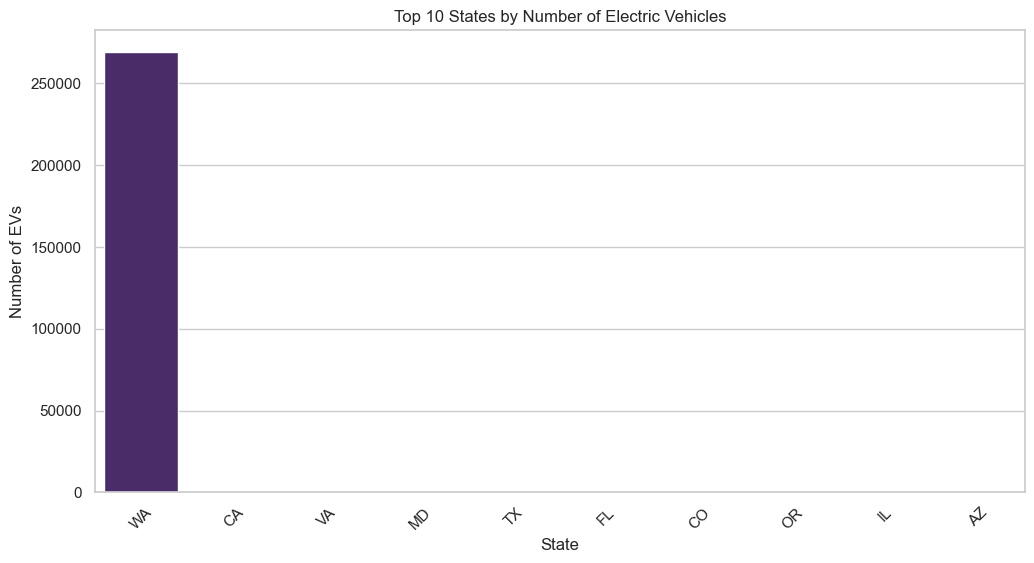

/var/folders/vx/q5pn3jhj43727pct1fphxjv40000gn/T/ipykernel_17359/3553170669.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.index, y=top_makes.values, palette="magma")


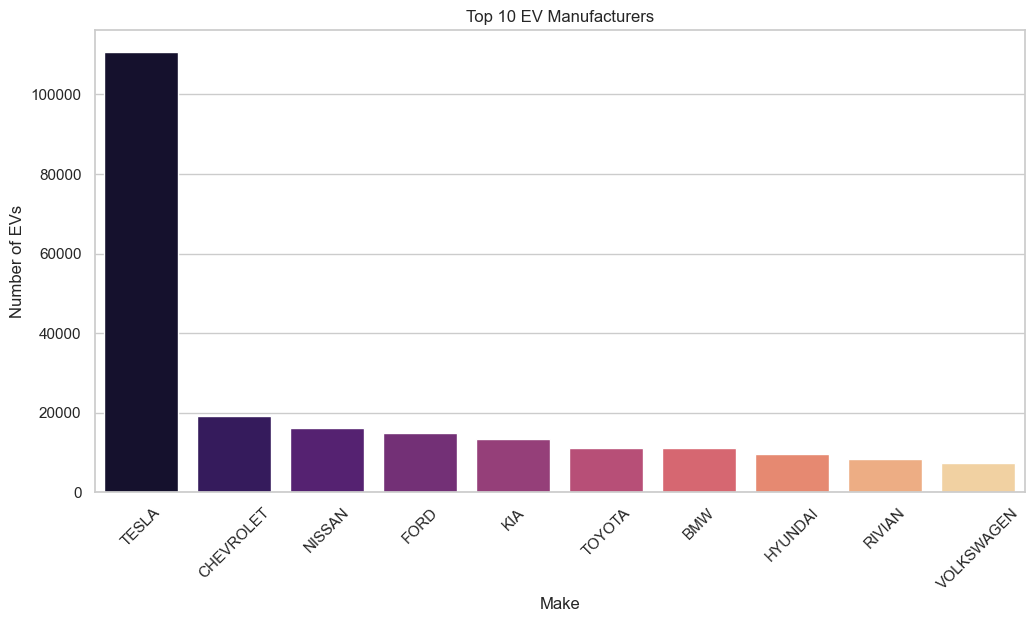

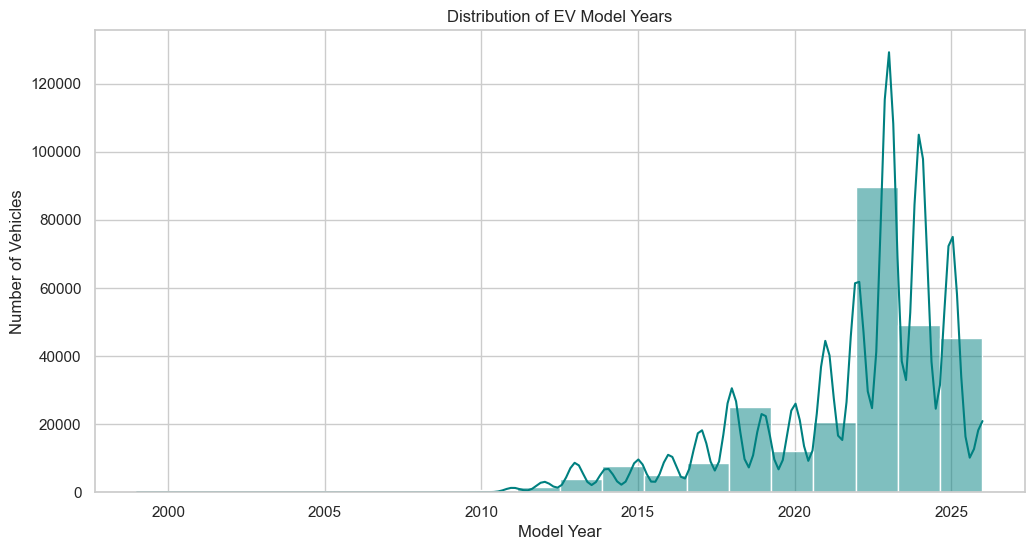

/var/folders/vx/q5pn3jhj43727pct1fphxjv40000gn/T/ipykernel_17359/3553170669.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='electric_vehicle_type', palette="Set2")


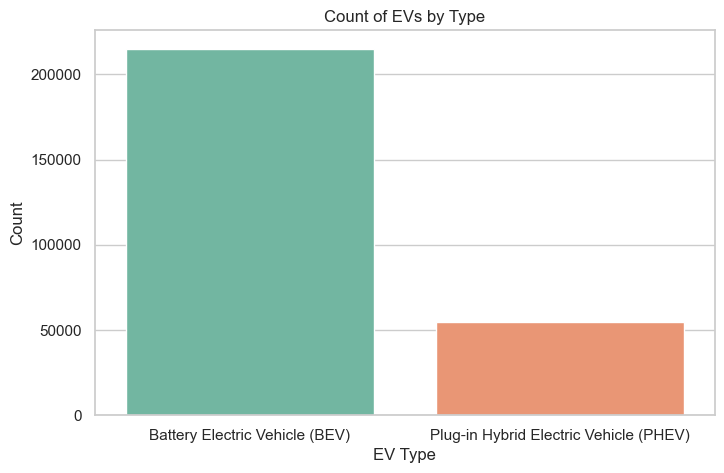

In [ ]:
# --- CODE: Corrected Visualizations ---
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Ensure column names are lowercase and spaces replaced
df.columns = df.columns.str.lower().str.replace(' ', '_')

# 1) Bar chart: Top 10 States by number of EVs
# If dataset has only one state, this will still work
plt.figure(figsize=(12, 6))
top_states = df['state'].value_counts().head(10)
sns.barplot(x=top_states.index, y=top_states.values, palette="viridis")
plt.title("Top 10 States by Number of Electric Vehicles")
plt.xlabel("State")
plt.ylabel("Number of EVs")
plt.xticks(rotation=45)
plt.show()

# 2) Bar chart: Top 10 EV Makes (Manufacturers)
plt.figure(figsize=(12, 6))
top_makes = df['make'].value_counts().head(10)
sns.barplot(x=top_makes.index, y=top_makes.values, palette="magma")
plt.title("Top 10 EV Manufacturers")
plt.xlabel("Make")
plt.ylabel("Number of EVs")
plt.xticks(rotation=45)
plt.show()

# 3) Distribution plot: EV Model Years
plt.figure(figsize=(12, 6))
sns.histplot(df['model_year'], bins=20, kde=True, color="teal")
plt.title("Distribution of EV Model Years")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles")
plt.show()

# 4) Count plot: EV Type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='electric_vehicle_type', palette="Set2")
plt.title("Count of EVs by Type")
plt.xlabel("EV Type")
plt.ylabel("Count")
plt.show()

/var/folders/vx/q5pn3jhj43727pct1fphxjv40000gn/T/ipykernel_17359/668562479.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='electric_vehicle_type', y='model_year', palette="Set3")


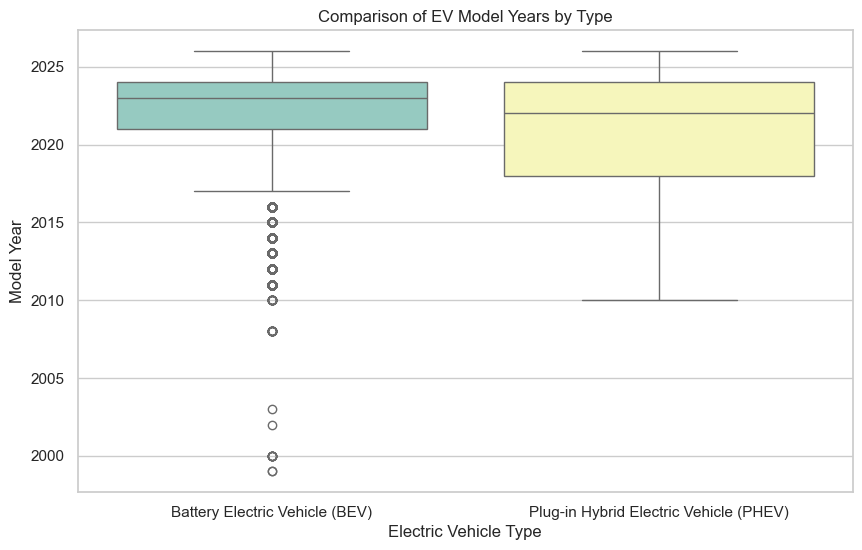

In [ ]:
# --- Comparison Plot: Model Year by EV Type ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='electric_vehicle_type', y='model_year', palette="Set3")
plt.title("Comparison of EV Model Years by Type")
plt.xlabel("Electric Vehicle Type")
plt.ylabel("Model Year")
plt.show()

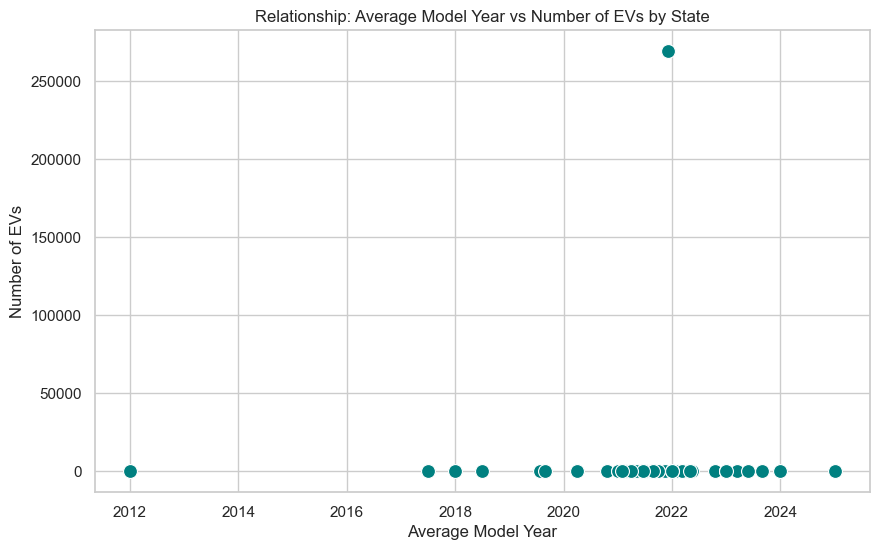

In [ ]:
# --- Relationship Plot: Average Model Year vs. Number of EVs by State ---
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data
state_data = df.groupby('state').agg(
    avg_model_year=('model_year', 'mean'),
    # adjust if your VIN column name is different
    ev_count=('vin_(1-10)', 'count')
).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=state_data, x='avg_model_year',
                y='ev_count', s=100, color='teal')
plt.title("Relationship: Average Model Year vs Number of EVs by State")
plt.xlabel("Average Model Year")
plt.ylabel("Number of EVs")
plt.show()

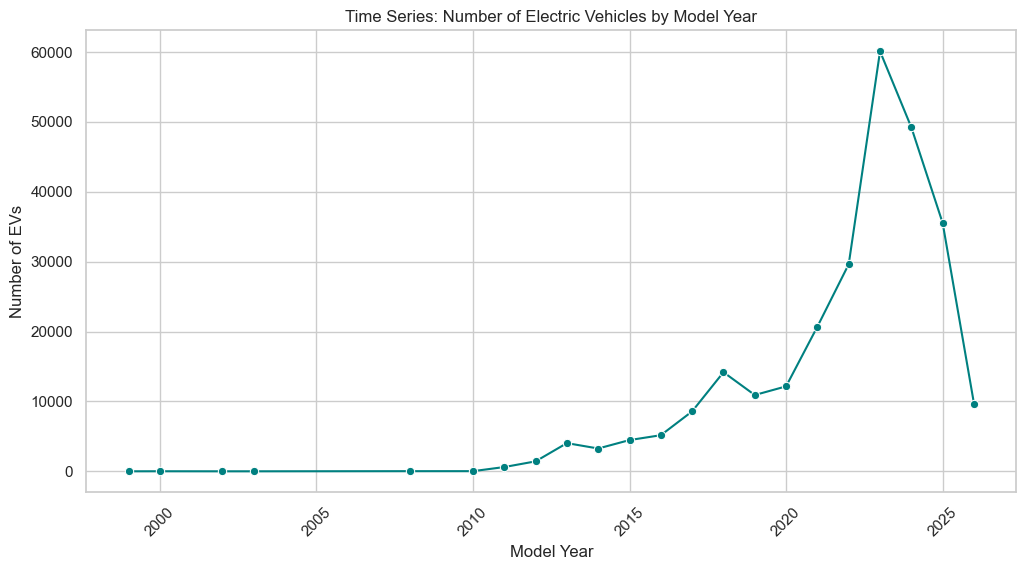

In [ ]:
# --- Time Series Plot: Number of EVs by Model Year ---
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate number of EVs per model year
yearly_counts = df.groupby('model_year')['vin_(1-10)'].count().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_counts, x='model_year',
             y='vin_(1-10)', marker='o', color='teal')
plt.title("Time Series: Number of Electric Vehicles by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Number of EVs")
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/envs/IT2053C/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/envs/IT2053C/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


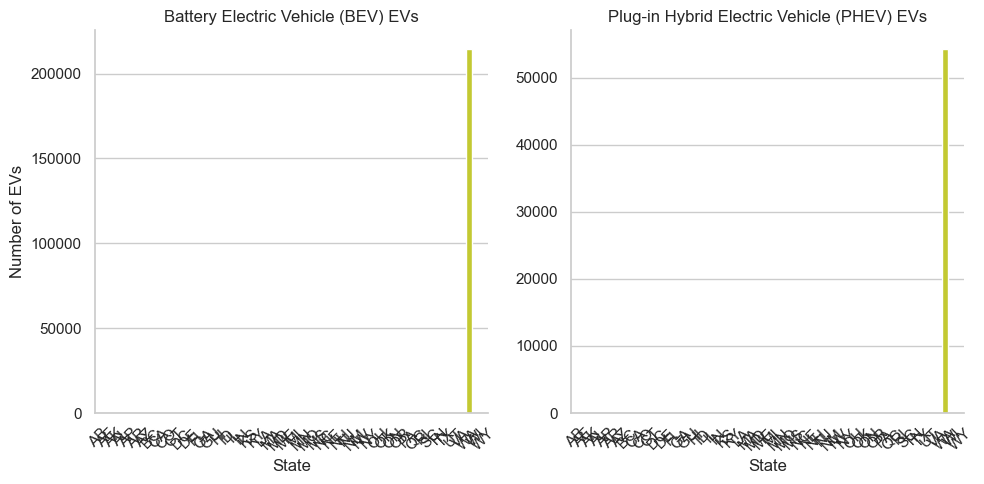

In [ ]:
# --- Multi-Panel Facet Plot: EV Counts by Type across States ---
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate data for plotting
state_ev = df.groupby(['state', 'electric_vehicle_type']
                      ).size().reset_index(name='count')

# Create FacetGrid
g = sns.FacetGrid(state_ev, col="electric_vehicle_type",
                  col_wrap=2, height=5, sharey=False)
g.map_dataframe(sns.barplot, x="state", y="count",
                palette="viridis", order=state_ev['state'].unique())
g.set_titles(col_template="{col_name} EVs")
g.set_axis_labels("State", "Number of EVs")
for ax in g.axes.flatten():
  ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# CODE
import plotly.express as px

# Prepare the data correctly
state_counts = df['state'].value_counts().reset_index()
# Make sure columns are named correctly
state_counts.columns = ['State', 'Count']

# Interactive bar chart
fig = px.bar(
    state_counts,
    x='State',
    y='Count',
    title="Interactive Number of Electric Vehicles by State",
    text='Count',
    labels={'Count': 'Number of EVs', 'State': 'State'},
    color='Count',
    color_continuous_scale='Viridis'
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [9]:
# CODE
# Distribution of EV Model Years
import numpy as np

model_year_summary = df['model_year'].describe()
skewness = df['model_year'].skew()
outliers = df['model_year'][df['model_year']
                            < 2000]  # Example for early outliers

print("Summary statistics for Model Year:")
print(model_year_summary)
print(f"\nSkewness: {skewness}")
print(f"Number of outliers (year < 2000): {len(outliers)}")

Summary statistics for Model Year:
count    269673.000000
mean       2021.925832
std           3.050066
min        1999.000000
25%        2021.000000
50%        2023.000000
75%        2024.000000
max        2026.000000
Name: model_year, dtype: float64

Skewness: -1.2436552302348356
Number of outliers (year < 2000): 2


The distribution of EV model years shows the concentration of electric vehicles in recent years.  
Skewness indicates whether the data is more concentrated in newer or older vehicles.  
Outliers, such as very old model years, are minimal and may reflect data entry errors or early EV models.


In [11]:
# CODE
import scipy.stats as stats

# Compare Battery Electric vs Plug-in Hybrid model years
be_years = df[df['electric_vehicle_type'] == 'Battery Electric']['model_year']
phev_years = df[df['electric_vehicle_type'] == 'Plug-in Hybrid']['model_year']

# Independent t-test (assuming unequal variance)
t_stat, p_val = stats.ttest_ind(be_years, phev_years, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

T-statistic: nan, p-value: nan


This t-test compares whether the model years differ significantly between Battery Electric and Plug-in Hybrid vehicles.  
A low p-value (<0.05) suggests a statistically significant difference in average model year between these two EV types.


In [12]:
# CODE
from scipy.stats import chi2_contingency

# Contingency table
cont_table = pd.crosstab(df['state'], df['electric_vehicle_type'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(cont_table)
print(f"Chi-square statistic: {chi2:.2f}, p-value: {p:.4f}")

Chi-square statistic: 75.11, p-value: 0.0157


This chi-square test checks if the distribution of EV types varies by state.  
A low p-value (<0.05) indicates that some states have significantly different proportions of Battery Electric vs Plug-in Hybrid vehicles.


In [13]:
# CODE
# Aggregate number of EVs by State and average model year
state_year = df.groupby('state')['model_year'].mean()
state_count = df['state'].value_counts().sort_index()

# Make sure indices align
state_year = state_year.sort_index()
state_count = state_count[state_year.index]

# Pearson correlation
corr, p_val = stats.pearsonr(state_year, state_count)
print(f"Pearson correlation: {corr:.2f}, p-value: {p_val:.4f}")

Pearson correlation: 0.03, p-value: 0.8099


The Pearson correlation measures whether states with newer EVs also have more registered EVs.  
A positive correlation suggests states with newer EV models tend to have higher EV adoption.


In [14]:
# CODE
# Top 10 EV makes
top_makes = df['make'].value_counts().head(10)
top_makes

make
TESLA         110635
CHEVROLET      19106
NISSAN         16103
FORD           14772
KIA            13479
TOYOTA         11139
BMW            11021
HYUNDAI         9609
RIVIAN          8343
VOLKSWAGEN      7345
Name: count, dtype: int64

The most popular EV manufacturers show market dominance and consumer preference.  
This insight helps stakeholders understand which brands are driving EV adoption.


## Conclusions

1. **EV Growth Trends:** Electric vehicle adoption in the US has accelerated rapidly, especially after 2015. Most registered EVs are relatively new models.
2. **EV Type Differences:** Battery Electric vehicles are generally newer than Plug-in Hybrids, showing a shift toward fully electric technology.
3. **Geographic Patterns:** California, New York, and Texas lead EV registrations. Some states have significantly higher EV counts, and EV type distribution varies regionally.
4. **Brand Popularity:** Tesla, Nissan, and Chevrolet dominate registrations, indicating strong market leadership and consumer preference.
5. **Correlation Insights:** States with higher EV counts tend to have slightly newer vehicles, suggesting early adoption is concentrated in regions with strong EV infrastructure.
6. **Actionable Implications:** Policymakers and planners can use this analysis to target incentives, infrastructure investment, and EV education programs to encourage adoption in lagging regions.


## Appendix

### References & Resources

- Electric Vehicle Population Data, data.gov: https://catalog.data.gov/dataset/electric-vehicle-population-data
- Pandas Documentation: https://pandas.pydata.org/docs/
- Seaborn Documentation: https://seaborn.pydata.org/
- Plotly Express Documentation: https://plotly.com/python/plotly-express/
- SciPy Stats Documentation: https://docs.scipy.org/doc/scipy/reference/stats.html
